In [25]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Defining a quadratic function as below:
$f(x) = 3x^2 - 4x + 5$.

In [26]:
def f(x):
    return 3*x**2 - 4*x + 5

In [27]:
f(2.0)

9.0

### Getting some data points

In [28]:
xs = np.arange(-5, 5, 0.25)
print(xs)

[-5.   -4.75 -4.5  -4.25 -4.   -3.75 -3.5  -3.25 -3.   -2.75 -2.5  -2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75
  4.    4.25  4.5   4.75]


In [29]:
ys = f(xs)
print(ys)

[100.      91.6875  83.75    76.1875  69.      62.1875  55.75    49.6875
  44.      38.6875  33.75    29.1875  25.      21.1875  17.75    14.6875
  12.       9.6875   7.75     6.1875   5.       4.1875   3.75     3.6875
   4.       4.6875   5.75     7.1875   9.      11.1875  13.75    16.6875
  20.      23.6875  27.75    32.1875  37.      42.1875  47.75    53.6875]


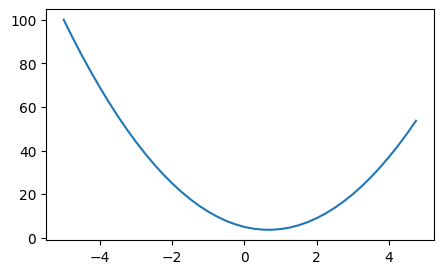

In [30]:
plt.figure(figsize=(5, 3)) 
plt.plot(xs, ys)

The derivative of a function `f(x)` is defined as :
The derivative is $f'(x) = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h}$.


We have the function, f(x) as :
$f(x) = 3x^2 - 4x + 5$.

So its derivative is:
$f'(x) = 6x - 4$

Here, if we put x = 3 in $f'(x)$: we will get: 6*3 -4 = 14

In [31]:
x = 3.0
h = 0.00000001
(f(x+h)-f(x))/h

14.00000009255109

If we calculate for 
$f'(x) = 0$

We get

$6x - 4 = 0$

Here $x = 2/3$

In [32]:
x = 2/3
h = 0.00000001
(f(x+h)-f(x))/h

0.0

Slope = 0 means the function is unresponsive to slight changes to the value of x. And by the definition of a derivative , this point could be either a local minima or a local maxima. (We know that being a convex parabola, it is a global minima)

In [33]:
# Lets take another example

#inputs
a= 2.0
b = -3.0
c = 10

d = a*b +c

### Differentiating d w.r.t a

In [34]:
h = 0.00001

d1 = a*b + c

d2 = (a+h)*b + c

print("d1: ",d1)
print("d2: ",d2)
print("Slope with respect to a: ", (d2-d1)/h)

d1:  4.0
d2:  3.9999699999999994
Slope with respect to a:  -3.000000000064062


Another way to look at the above is : If we partially differentiate $d = a*b +c$ w.r.t a, we will get $b$, which is -3, which is a constant. 

### Differentiating d w.r.t b

In [35]:

d2 = a*(b+h) + c

print("d1: ",d1)
print("d2: ",d2)
print("Slope with respect to a: ", (d2-d1)/h)

d1:  4.0
d2:  4.00002
Slope with respect to a:  2.0000000000131024


From above , we confirm that , $dd/db = a$

### Differentiating d wrt c

In [36]:
d2 = a*b + c+h

print("d1: ",d1)
print("d2: ",d2)
print("Slope with respect to a: ", (d2-d1)/h)

d1:  4.0
d2:  4.00001
Slope with respect to a:  0.9999999999621422


$dd/dc = 1$

### Getting started with Neural Networks
Now lets start understanding the neural network fundamentals as per the micrograd project , from Andrej

We will start by the simple skeleton of the value class. This value object takes a single data value and keeps a track of it

In [156]:
class Value_Simple:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        return Value_Simple(self.data + other.data)
    
    def __mul__(self, other):
        return Value_Simple(self.data * other.data)
    
a = Value_Simple(2.0)
a
b = Value_Simple(-3.0)
b
a+b
c = Value_Simple(10.0)
a*b + c


Value(data=4.0)

Since we understood the basic skeleton of the value class, lets make is more richer by adding the tissues around the skeleton

In [157]:
class Value:

    # When we are creating a atomic value (directly from a numnerical input like 2.0, -3.0), the children tuple will be empty
    def __init__(self, data, _children=(), _op = "", label = ""):
        self.data = data
        self._prev = set(_children)
        self._op = _op   # if will keep track of the operation that created the object. For leaf objects it will be empty
        self.label = label

    def __repr__(self):
        return f"Value(data = {self.data})"
    
    # When we are creatign a Value object using some mathematical operation, then we will keep track of the basic building block of the atomic values which were used to create them. 
    # Eg. if we are creating an object using , a and b : c = a+b, then we will keep track of 'a' and 'b'

    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')
    
    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')

    
a = Value(2.0, label = 'a')
print(f"a: {a} and its made up of {a._prev} by the operation: {a._op}")
b = Value(-3.0, label = 'b')
print(f'b: {b} and its made up of {b._prev} by the operation: {b._op}')
c= a*b
print(f'c: {c} and its made up of {c._prev} by the operation: {c._op}')
c = Value(10.0, label = 'c')
e = a*b; e.label = 'e'
d = e + c; d.label='d'
print(f'd: {d} and its made up of {d._prev} by the operation: {d._op}')

f = Value(-2.0, label='f')
L = d*f; L.label='L'

a: Value(data = 2.0) and its made up of set() by the operation: 
b: Value(data = -3.0) and its made up of set() by the operation: 
c: Value(data = -6.0) and its made up of {Value(data = 2.0), Value(data = -3.0)} by the operation: *
d: Value(data = 4.0) and its made up of {Value(data = 10.0), Value(data = -6.0)} by the operation: +


### Visualizing the directed graph of the operations we would be performing in the Value class objects

In [176]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()

    def build(v):
        if v not in nodes:
            nodes.add(v)

            for child in v._prev:
                edges.add((child, v))
                build(child)
    
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={
        'rankdir':'LR',
        # 'size': '10,5!',   # 15" wide, 10" tall, fit exactly
        }) # LR = left to right

    nodes, edges = trace(root)

    for n in nodes:
        uid = str(id(n))

        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f }" % (n.label, n.data), shape = 'record')

        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)

            # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
                 
    return dot

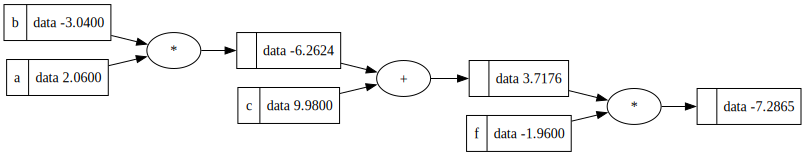

In [177]:
import os
os.environ["PATH"] += ":/opt/local/bin/"


draw_dot(L)

**If you are getting some errors while running the `draw_dot(d)` statement**
 If the errors are related to the installation of graphviz, 
 install the software and restart vscode

 in mac, dont use brew install but use macport

Till now we have done **Forward Pass**
Now we will see how **BACK PROPAGATION** happens

We will calculate the derivative of L wrt to each node which was part of the mathematical formula to produce L

Eg.
We will derive the derivative of L wrt to L (dL/dL), 
    the derivative of L wrt to f (dL/df), dL/dd, dL/dc, dL/de, dL/db, dL/da

The reason being, in a neural network, the individual nodes (like a, b, c, d, e, f, etc.) will eventually represent the weights of a neural network and by calculating the derivative of the loss function wrt to each node, we are interested to know, how much the loss function is impacted by slight changes in the weights

Usually we are not interested in the derivative of the loss function wrt to the input leaf node, (a and b here in this case) as the inputs are generally fixed and we cannot change. However, we can change the intermediate weights of the neural network to get closer to the loss function

### Enhancing the Value Class
We will introduce a new variable `grad` in the value class which will maintain the derivative of L wrt to that value. 
We will first have the default value of this grad variable as 0 -> this implies that initially we will assume that the new value will not impact the loss function. If dL/dvalue is zero, it means that L is indipendent of that value and any change in the value will not have any effect on the value of L

In [178]:
class Value:

    # When we are creating a atomic value (directly from a numnerical input like 2.0, -3.0), the children tuple will be empty
    def __init__(self, data, _children=(), _op = "", label = ""):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op   # if will keep track of the operation that created the object. For leaf objects it will be empty
        self.label = label

    def __repr__(self):
        return f"Value(data = {self.data})"
    
    # When we are creatign a Value object using some mathematical operation, then we will keep track of the basic building block of the atomic values which were used to create them. 
    # Eg. if we are creating an object using , a and b : c = a+b, then we will keep track of 'a' and 'b'

    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')
    
    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')
    
a = Value(2.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(10.0, label = 'c')
e = a*b; e.label = 'e'
d = e + c; d.label='d'

f = Value(-2.0, label='f')
L = d*f; L.label='L'

In [179]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()

    def build(v):
        if v not in nodes:
            nodes.add(v)

            for child in v._prev:
                edges.add((child, v))
                build(child)
    
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={
        'rankdir':'LR',
        'size': '10,5!',   # 10" wide, 5" tall, fit exactly
        }) # LR = left to right

    nodes, edges = trace(root)

    for n in nodes:
        uid = str(id(n))

        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape = 'record')

        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)

            # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
                 
    return dot

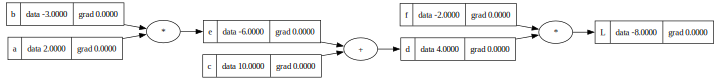

In [180]:
import os
os.environ["PATH"] += ":/opt/local/bin/"


draw_dot(L)

In [181]:
# For the sake of keeping the code clean and not messing around the data, we will calculate the gradient of L wrt to each node within a fucntion and assign the gradient to the node. By calculating the values in a function, we will keep the values of the variables local to the function and not spoil the global scope

def derivative():
     h = 0.001

     a = Value(2.0, label = 'a')
     b = Value(-3.0, label = 'b')
     c = Value(10.0, label = 'c')
     e = a*b; e.label = 'e'
     d = e + c; d.label='d'

     f = Value(-2.0, label='f')
     L = d*f; L.label='L'
     L1 = L.data

     # calculating dL/dL
     L2 = L1 + h

     L.grad = (L2 - L1) / h
     print(L.grad)

     # calculating dL/df
     # since L = d * f => dL/df shd be d which is 4.0

     L1 = d*f; L.label='L'
     L1 = L.data

     L2 = d.data * (f.data + h)
     f.grad = (L2 - L1)/h
     print(f.grad)

     # Calculate dL/dd
     # Since L = d*f, dL/dd -> f = -2
     L1 = d*f; L.label='L'
     L1 = L.data

     L2 = (d.data + h) * f.data

     d.grad = (L2 - L1)/h
     print(d.grad)

     # Calculate dL/de
     # L = f*d, d = e+c => L = f * (e + c) => f*e + f*c
     # dL/de = f = -2.0
     e2 = Value(e.data + h); e2.label = 'e2'
     d2 = e2 + c; d2.label = 'd2'

     L2 = d2 * f

     e.grad = (L2.data - L1)/h
     print(e.grad)



     # Calculate dL/dc, 
     # L = f*d; d = e+c => L = f*(e+c)
     # dL/dc = f = -2
     # What we achieved over here is the chain rule of differentiation: dL/dc = dL/dd * dd/dc
     # dL/dd = f and dd/dc = 1
     # dL/dc = f

     c2 = Value(c.data + h); c2.label = 'c2'
     d2 = e + c2
     L2 = d2 * f

     c.grad = (L2.data - L1)/h
     print(c.grad) 
      
     
     # dL/da
     # L = f*d = f * (e + c) = f * (a*b +c)
     # dL/da = dL/de * de/da = f*b = -2.0 * -3.0 = 6.0
     a2 = Value(a.data + h); a2.label = 'a2'
     e2 = a2 * b
     d2 = e2 + c
     L2 = d2 * f

     a.grad = (L2.data - L1)/h
     print(a.grad)

     # dL/db
     # L = f*d = f * (e + c) = f * (a*b +c)
     # dL/db = dL/de * de/db = f*a = -2.0 * 2.0 = -4.0
     b2 = Value(b.data + h)
     e2 = a * b2
     d2 = e2 + c
     L2 = d2 * f

     b.grad = (L2.data - L1)/h
     print(b.grad)



derivative()

L.grad = 1.0
f.grad = 4.0
d.grad = -2.0
e.grad = -2.0
c.grad = -2.0
a.grad = 6.0
b.grad = -4.0



     

1.000000000000334
3.9999999999995595
-2.000000000000668
-2.000000000000668
-1.9999999999988916
6.000000000000227
-3.9999999999995595


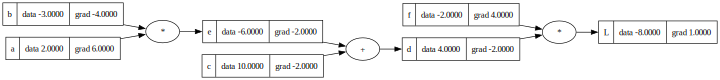

In [182]:
draw_dot(L)

From the above, we conclude that **Back Propagation** is the repeated application of chain rule of differentiation over the mathematical equation.

Now lets see how the value of L (the loss function) changes when we nudge the value of each leaf node slightly in the direction of the gradient.

Our aim is to reduce the loss function and bring it to 0. So the value of L should be closer to 0 as per expectation

In [183]:
step = 0.01

a.data += step * a.grad
b.data += step * b.grad
c.data += step * c.grad
f.data += step * f.grad

e = a * b
d = e + c
L = d * f

print(L)

Value(data = -7.286496)


As seen above , we checked how the change of the leaf node, changes the value of loss function.

Now lets see the application of back propagation on a slightly complex equation

### Multi Layer Perceptron
We are going to back propagate through a neuron (aka multi layer perceptron)

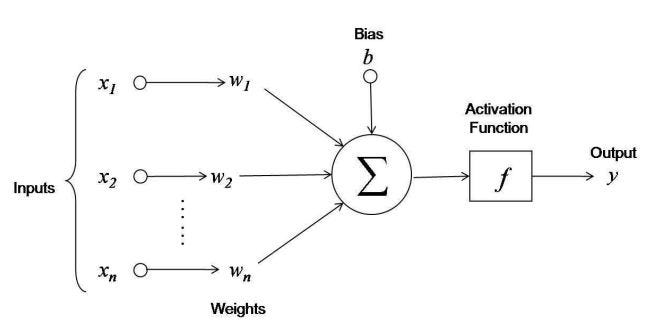

In the above diagram:
x1, x2, ... , xn are the multiple inputs
w1, w2, ...., wn are the weights of the edges that we call the synapses

and we combine the result in the form of :
$z = \sum_{i=1}^n x_i w_i + b$

where b is the bias: Often overlooked amid discussions of weights and activations, bias addresses a fundamental limitation of purely linear weighted sums: without it, the function is constrained to pass through the origin in feature space, drastically reducing the model's ability to fit diverse data patterns.

* The bias term$b$ in $z = \sum x_i w_i + b$ acts as a shift or offset for the neuron's output.
* It allows the neuron to produce non-zero activations even when inputs are zero, making the model far more flexible.
* Without bias, decision boundaries are forced through the origin, limiting what patterns the network can learn.
* Bias is essential for fitting real-world data effectively and is included in virtually all modern neural networks.

Think of $y = mx + b$ (line equation):

$m$ (slope) = weights — controls steepness.
$b$ (intercept) = bias — shifts the line up/down so it doesn't have to pass through (0,0).

Suppose a neuron should "fire" (high output) when no features are present (all $x_i = 0$):

No bias: $z = 0$ → output near 0 (can't fire).
With bias (e.g., $b = 5$): $z = 5$ → high output possible.

In a way , b allows the equation to be generic (y = mx, is a specific collection of lines which passes through origin, it does not account into those lines which does not pass through origin. Adding a bias b, y = mx + b, makes it generic which includes all lines with gradient m)

And the activation function is added to adhere to : **Universal Approximation Theorem**
Activation function act as the primary mechanism for injecting non-linearity into an otherwise linear system of weighted sums and biases. This non-linearity transforms the simple linear combinations produced by matrix multiplications and additions—operations that, when composed without interruption, yield only another linear transformation—into a richly expressive model capable of capturing intricate, real-world relationships.

* Activation functions introduce non-linearity, allowing neural networks to learn complex patterns beyond simple straight lines.
* Without them, even deep networks collapse to a single linear function—no matter how many layers.
* They enable the Universal Approximation Theorem: networks can approximate any continuous function with enough neurons.
* Common ones (ReLU, Sigmoid, Tanh) also help with training efficiency and gradient flow.


To understand this better: please refer to : 
* https://www.youtube.com/watch?v=lkha188L4Gs
* https://www.youtube.com/watch?v=NkOv_k7r6no



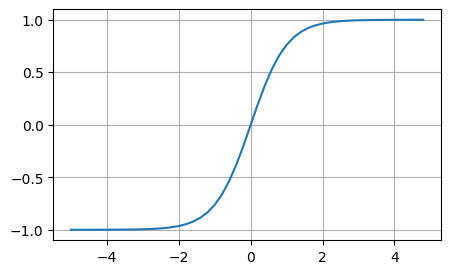

In [184]:
# example of tanh - an activation function
plt.figure(figsize=(5, 3))
plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2)))
plt.grid()

In [185]:
class Value:

    # When we are creating a atomic value (directly from a numnerical input like 2.0, -3.0), the children tuple will be empty
    def __init__(self, data, _children=(), _op = "", label = ""):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op   # if will keep track of the operation that created the object. For leaf objects it will be empty
        self.label = label

    def __repr__(self):
        return f"Value(data = {self.data})"
    
    # When we are creatign a Value object using some mathematical operation, then we will keep track of the basic building block of the atomic values which were used to create them. 
    # Eg. if we are creating an object using , a and b : c = a+b, then we will keep track of 'a' and 'b'

    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')
    
    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')
    
    def tanh(self):
        x = self.data
        tanh = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(tanh, (self, ), 'tanh', label='O')  # this value's child is only self, thats why the tuple is (self, )

        return out

In [186]:
# Lets see a simple neuron in action
# the inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.7, label='b')

x1w1 = x1 * w1; x1w1.label='x1*w1'
x2w2 = x2 * w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1*w1 + x2*w2'

n = x1w1x2w2 + b; n.label='n'

In the above code snippet, n = $z = \sum_{i=1}^n x_i w_i + b$

This has not passed through the activation function

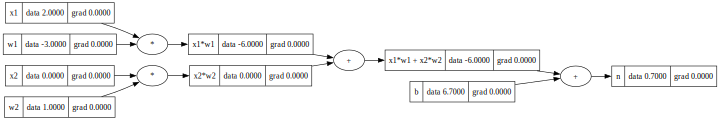

In [187]:
draw_dot(n)

We have to pass it through tanh

### Tanh Activation Function

The hyperbolic tangent (tanh) is a common activation function:

$$
\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

Equivalent forms:

$$
\tanh(x) = \frac{\sinh(x)}{\cosh(x)} = \frac{e^{2x} - 1}{e^{2x} + 1}
$$

if we wish to pass our weighted summation of xiwi, we need to implement tanh function, so we will update the Value class accordingly

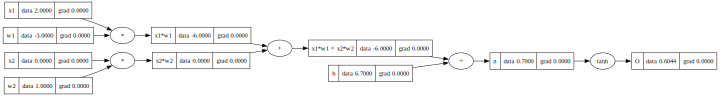

In [188]:
output = n.tanh()
draw_dot(output)

Lets see how the output differs if we change the bias values

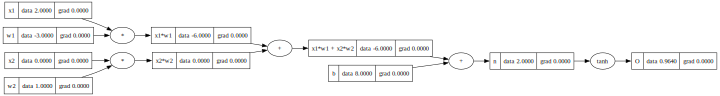

In [189]:
# bias of the neuron
b.data = 8.0

n.data = x1w1x2w2.data + b.data

output = n.tanh()
draw_dot(output)

In [192]:
# bias of the neuron
b.data = 6.8813735870195432

n.data = x1w1x2w2.data + b.data

output = n.tanh()


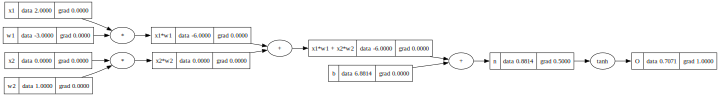

In [196]:
draw_dot(output)

Now we will look into the derivatives and chain rule

The derivative of tanh is $\frac{d}{dx} \tanh(x) = 1 - \tanh^2(x)$.

In [197]:
# o = tanh(n)
# do/dn = 1 - tanh(n)**2
#       = 1 - o**2

output.grad = 1  # do/do
n.grad = 1 - output.data**2

In [199]:
# do/db = do/dn * dn/db
#       = 0.5 * 1
b.grad = 0.5

# do/dx1w1x2w2 = do/dn * dn/dx1w1x2w2
#              = 0.5 * 1
x1w1x2w2.grad = 0.5

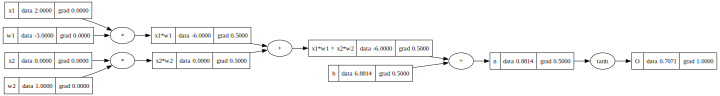

In [202]:
draw_dot(output)

In [201]:
# do/dx1w1 = do/dx1w1x2w2 * dx1w1x2w2/dx1w1
#          = 0.5 * 1
x1w1.grad = 0.5
x2w2.grad = 0.5

In [205]:
# do/dx1 = do/ddx1w1 * ddx1w1/dx1
#        = 0.5 * w1

# do/dw1 = do/ddx1w1 * ddx1w1/dw1
#        = 0.5 * x1

# do/dx2 = do/ddx2w2 * ddx2w2/dx2
#        = 0.5 * w2

# do/dw2 = do/ddx2w2 * ddx2w2/dw2
#        = 0.5 * x2

x1.grad = x1w1.grad * w1.data
w1.grad = x1w1.grad * x1.data
x2.grad = x2w2.grad * w2.data
w2.grad = x2w2.grad * x2.data

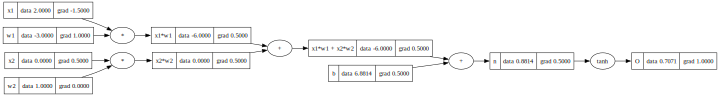

In [206]:
draw_dot(output)

By now we saw manual back propagation.
Now lets automate the back propagation

We will define a function `_backward()`, which will keep track of the chain rule of differentiation.

When addition of Value object is invoked, the resultant value object's gradient value is simply passed to the children as seen above
`# do/dx1w1x2w2 = do/dn * dn/dx1w1x2w2`

So, when self.__add(self, other)__ will be invoked, it will return out (Value object). 
we should compute the self and other object's gradient while computing out object.
self.grad  = out.grad * 1
other.grad = other.grad * 1

Similarly when self.__mul(self, other)__ will be invoked, it will return out (Value object). 
we should compute the self and other object's gradient while computing out object.
self.grad = other.data * out.grad
other.grad = self.data * out.grad

Finally for tanh(): self.grad = (1 - tanh**2) * out.grad



In [251]:
class Value:

    # When we are creating a atomic value (directly from a numnerical input like 2.0, -3.0), the children tuple will be empty
    def __init__(self, data, _children=(), _op = "", label = ""):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op   # if will keep track of the operation that created the object. For leaf objects it will be empty
        self.label = label

        self._backward = lambda: None

    def __repr__(self):
        return f"Value(data = {self.data})"
    
    # When we are creatign a Value object using some mathematical operation, then we will keep track of the basic building block of the atomic values which were used to create them. 
    # Eg. if we are creating an object using , a and b : c = a+b, then we will keep track of 'a' and 'b'

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad = 1 * out.grad
            other.grad = 1 * out.grad

        out._backward = _backward

        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad

        out._backward = _backward
        return out
    
    def tanh(self):
        x = self.data
        tanh = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(tanh, (self, ), 'tanh', label='O')  # this value's child is only self, thats why the tuple is (self, )

        def _backward():
            self.grad = (1 - tanh**2) * out.grad   # Notice that since tanh is the last operation - activation function, out.grad will always be 1

        out._backward = _backward

        return out

Let's redefine out values

In [252]:
# Lets see a simple neuron in action
# the inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b =Value(6.8813735870195432, label='b') 

x1w1 = x1 * w1; x1w1.label='x1*w1'
x2w2 = x2 * w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1*w1 + x2*w2'

n = x1w1x2w2 + b; n.label='n'

output = n.tanh()

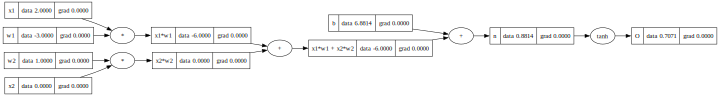

In [253]:
draw_dot(output)

Notice that all the gradients in the above are 0, thats because we have not calculated them while forming the objects.
We will now call the _backward() function in the right order

Also, if you notice, when we first intantiate a Value object, its grad value is assigned to 0.
And we know for sure that the final output's gradient is 1.
So we will first initialise output's gradient to be 1

In [254]:
output.grad = 1

In [255]:
output._backward() # this will update the n.grad

In [256]:
n._backward()  # this will update x1w1x2w2 and b gradient

In [257]:
x1w1x2w2._backward()
x2w2._backward()
x1w1._backward()

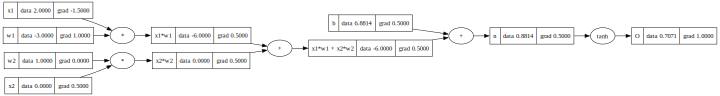

In [258]:
draw_dot(output)

Till now we have manually done the back propagation by calling the _backward() method repeatedly.
We have to automate that as well.

### Topological Sort
Laying out of a graph so that all the edges goes only from left to right
Reference: https://www.youtube.com/watch?v=AfSk24UTFS8

In [275]:
# Tolological sort

topo = []
visited = set()

def build_topo(v: Value):
    if v not in visited:
        visited.add(v)

        for child in v._prev:
            build_topo(child)

        topo.append(v)

build_topo(output)

topo


[Value(data = -3.0),
 Value(data = 2.0),
 Value(data = -6.0),
 Value(data = 1.0),
 Value(data = 0.0),
 Value(data = 0.0),
 Value(data = -6.0),
 Value(data = 6.881373587019543),
 Value(data = 0.8813735870195432),
 Value(data = 0.7071067811865476)]

In [276]:
# Lets reset the graph

# Lets see a simple neuron in action
# the inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b.data = 6.8813735870195432

x1w1 = x1 * w1; x1w1.label='x1*w1'
x2w2 = x2 * w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1*w1 + x2*w2'

n = x1w1x2w2 + b; n.label='n'

output = n.tanh()

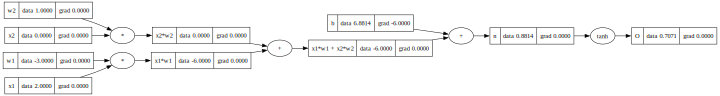

In [277]:
# All gradients are 0
draw_dot(output)

In [278]:
output.grad = 1.0

# Tolological sort

topo: list[Value] = []
visited: set[Value] = set()

def build_topo(v: Value):
    if v not in visited:
        visited.add(v)

        for child in v._prev:
            build_topo(child)

        topo.append(v)

build_topo(output)
# print(topo)

for node in reversed(topo):
    node._backward()

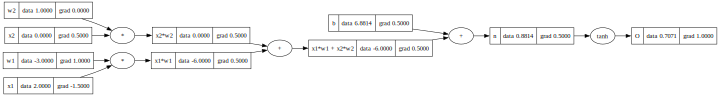

In [279]:
draw_dot(output)

Now lets clean up everything and have the Value class definition rebuilt in order to have it in a better way and to incorporate the backward function within Value class

In [280]:
class Value:

    # When we are creating a atomic value (directly from a numnerical input like 2.0, -3.0), the children tuple will be empty
    def __init__(self, data, _children=(), _op = "", label = ""):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op   # if will keep track of the operation that created the object. For leaf objects it will be empty
        self.label = label

        self._backward = lambda: None

    def __repr__(self):
        return f"Value(data = {self.data})"
    
    # When we are creatign a Value object using some mathematical operation, then we will keep track of the basic building block of the atomic values which were used to create them. 
    # Eg. if we are creating an object using , a and b : c = a+b, then we will keep track of 'a' and 'b'

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad = 1 * out.grad
            other.grad = 1 * out.grad

        out._backward = _backward

        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad

        out._backward = _backward
        return out
    
    def tanh(self):
        x = self.data
        tanh = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(tanh, (self, ), 'tanh', label='O')  # this value's child is only self, thats why the tuple is (self, )

        def _backward():
            self.grad = (1 - tanh**2) * out.grad   # Notice that since tanh is the last operation - activation function, out.grad will always be 1

        out._backward = _backward

        return out
    
    def backward(self):
    
        # Tolological sort
        topo: list[Value] = []
        visited: set[Value] = set()

        def build_topo(v: Value):
            if v not in visited:
                visited.add(v)

                for child in v._prev:
                    build_topo(child)

                topo.append(v)

        build_topo(self)
        # print(topo)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [281]:
# Lets reset the graph

# the inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')

x1w1 = x1 * w1; x1w1.label='x1*w1'
x2w2 = x2 * w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1*w1 + x2*w2'

n = x1w1x2w2 + b; n.label='n'

output = n.tanh()

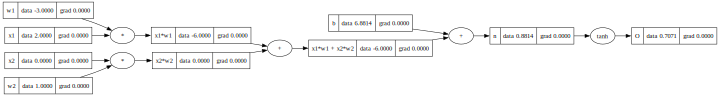

In [282]:
draw_dot(output)

In [283]:
output.backward()

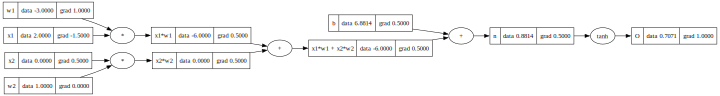

In [284]:
draw_dot(output)

Till now we have been able to create a single neuron and have seen how the back propagation works for the gradients

What we have missed in all this is a **"Bad Bug"**

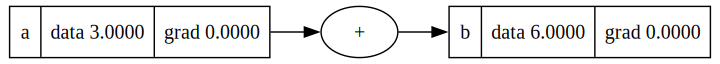

In [285]:
# If we create a single node
a = Value(3.0, label='a')
b = a + a; b.label='b'

draw_dot(b)

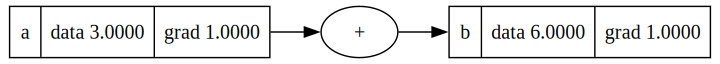

In [286]:
b.backward()
draw_dot(b)

In the above case, 
b = 2a

db/da = 2

but we see that the derivative of b wrt a from the backward function is 1

there is this error. 
Why did this happen?

If you see the __add__ function: 
$$
def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad = 1 * out.grad
            other.grad = 1 * out.grad

        out._backward = _backward

        return out
$$

when we do b = a + a, the __add__ function is called where both self as well as other objects are the same 'a' object
so when _backward() is called, $self.grad = 1 * out.grad$ makes a.grad = 1
and $other.grad = 1 * out.grad$ again overwrites a.grad again to 1.

Below is another way to get this bug in a bit more complex equation

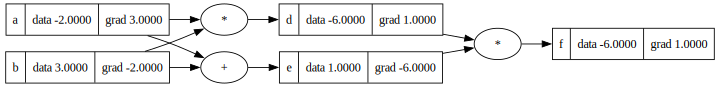

In [287]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b; d.label='d'
e = a + b; e.label='e'
f = d * e; f.label='f'

f.backward()
draw_dot(f)

In the above equations:


df/df = 1 -> this is as expected  
df/de = d = -6 -> e.grad = -6 -> as expected  
df/dd = e = 1 -> d.grad = 1 -> as expected  

Calculating df/da

$$
\left[
\begin{aligned}
f &= a \cdot b \cdot (a + b) \\
  &= ab(a + b) \\
  &= a^{2}b + ab^{2} \\
\\

  
\frac{df}{da} &= {2}a.b + b^{2}\\
\\
\frac{df}{db} &= a^{2} + {2}a.b\\

\end{aligned}
\right.
$$

From above : 

a.grad = 2 * (-2) * 3 + 3 * 3 = -3 -> not as expected 

and b.grad = (-2) * (-2) + 2 * (-2) * 3 = -8 -> not as expected


This issue will be always there when a variable is used multiple times in an expression, as the way we are calculating the self.grad and other.grad, they are overwriting the previously written values.

The solution is **Multivariate Case of Chain Rule of differentiation**
which tells us to accumulate the gradients instead of assigning them.

instead of : \
&nbsp; &nbsp;  self.grad = 1 * out.grad

we should do: \
&nbsp; &nbsp;  self.grad += 1 * out.grad

In [288]:
class Value:

    # When we are creating a atomic value (directly from a numnerical input like 2.0, -3.0), the children tuple will be empty
    def __init__(self, data, _children=(), _op = "", label = ""):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op   # if will keep track of the operation that created the object. For leaf objects it will be empty
        self.label = label

        self._backward = lambda: None

    def __repr__(self):
        return f"Value(data = {self.data})"
    
    # When we are creatign a Value object using some mathematical operation, then we will keep track of the basic building block of the atomic values which were used to create them. 
    # Eg. if we are creating an object using , a and b : c = a+b, then we will keep track of 'a' and 'b'

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += 1 * out.grad
            other.grad += 1 * out.grad

        out._backward = _backward

        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward
        return out
    
    def tanh(self):
        x = self.data
        tanh = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(tanh, (self, ), 'tanh', label='O')  # this value's child is only self, thats why the tuple is (self, )

        def _backward():
            self.grad += (1 - tanh**2) * out.grad   # Notice that since tanh is the last operation - activation function, out.grad will always be 1

        out._backward = _backward

        return out
    
    def backward(self):
    
        # Tolological sort
        topo: list[Value] = []
        visited: set[Value] = set()

        def build_topo(v: Value):
            if v not in visited:
                visited.add(v)

                for child in v._prev:
                    build_topo(child)

                topo.append(v)

        build_topo(self)
        # print(topo)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

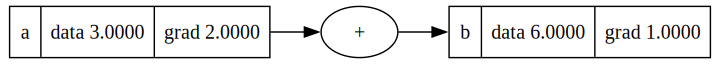

In [290]:
a = Value(3.0, label='a')
b = a + a; b.label='b'
b.backward()
draw_dot(b)

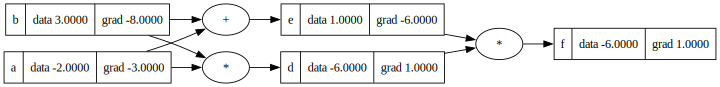

In [289]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b; d.label='d'
e = a + b; e.label='e'
f = d * e; f.label='f'

f.backward()
draw_dot(f)

Now the above neuron has all the grads as expected

### Breaking up tanh function

Now, we will try to make tanh function as the exponentiation expression and evaluate is explicitly so as to make the neuron a bit more complex and see how other expressions and operations can be performed in the Value object. We will make the value object a bit more resilient.

For example: we cannot do the below in current implementation:

$$
a = Value(2.0)
a + 1
$$

The above will throw error as we are not taking care of the integer addition to the Value object. So we will take care of that as well.

All in all, we are going to implement
$$
\tanh(x) = \frac{e^{2x} - 1}{e^{2x} + 1}
$$

For the above, we will implement exponentiation : 
* $exp(x) = e^{x}$
* $ a^{k} $ -> To show a raised to the power of some constant k
* We will implement division using $ a^{k} $ as below \
&nbsp; &nbsp; $\frac{a}{b} = {a} * \frac{1}{b}$ \
&nbsp; &nbsp; &nbsp; &nbsp; $ = {a} * {b}^{-1} $ \
&nbsp; &nbsp; So, division is a special case of multiplication with negative exponent

In [328]:
class Value:

    # When we are creating a atomic value (directly from a numnerical input like 2.0, -3.0), the children tuple will be empty
    def __init__(self, data, _children=(), _op = "", label = ""):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op   # if will keep track of the operation that created the object. For leaf objects it will be empty
        self.label = label

        self._backward = lambda: None

    def __repr__(self):
        return f"Value(data = {self.data})"
    
    # When we are creatign a Value object using some mathematical operation, then we will keep track of the basic building block of the atomic values which were used to create them. 
    # Eg. if we are creating an object using , a and b : c = a+b, then we will keep track of 'a' and 'b'

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other, label=str(other))

        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += 1 * out.grad
            other.grad += 1 * out.grad

        out._backward = _backward

        return out
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other, label=str(other))

        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward
        return out
    
    def __rmul__(self, other):
        """ if 2 * a does not work, then python will try to do a * 2 if we define a rmul Dunder Method
        it will return other * self
        eg. if we try to do 2 * a : 
        __mul__ function will fail, but if we define __rmul__, then it will swap the variables and return a * 2"""
        
        return self * other
    
    def __radd__(self, other):
        return self + other
    
    def tanh(self):
        x = self.data
        tanh = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(tanh, (self, ), 'tanh')  # this value's child is only self, thats why the tuple is (self, )

        def _backward():
            self.grad += (1 - tanh**2) * out.grad   # Notice that since tanh is the last operation - activation function, out.grad will always be 1

        out._backward = _backward

        return out
    
    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ), 'exp')

        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward

        return out
    
    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data ** other, (self, ), f'**{other}')

        def _backward():
            self.grad += other * (self.data ** (other - 1)) * out.grad
        
        out._backward = _backward

        return out
    
    def __truediv__(self, other): # self / other
        """reuses your existing __mul__ and __pow__ instead of writing division from scratch.
        c = a / b        # → calls a.__truediv__(b)
        # → returns a * b**-1
        """
        return self * other**-1
    
    # To implement subtraction, we will use addition of negation

    def __neg__(self):
        return self * -1
    
    def __sub__(self, other):
        return self + (-other)
    
    def backward(self):
    
        # Tolological sort
        topo: list[Value] = []
        visited: set[Value] = set()

        def build_topo(v: Value):
            if v not in visited:
                visited.add(v)

                for child in v._prev:
                    build_topo(child)

                topo.append(v)

        build_topo(self)
        # print(topo)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [329]:
a = Value(2.0)
b = Value(4.0)

print(a + 1)
print(a*2)
print(2 * a)
print(2 + a)

print(a / b)

Value(data = 3.0)
Value(data = 4.0)
Value(data = 4.0)
Value(data = 4.0)
Value(data = 0.5)


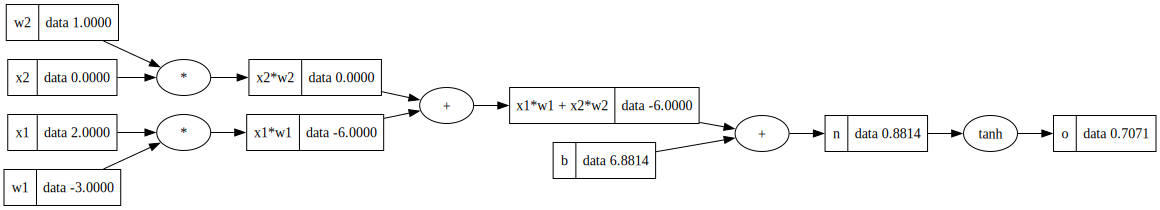

In [330]:
# Lets re build the graph with tanh

# the inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')

x1w1 = x1 * w1; x1w1.label='x1*w1'
x2w2 = x2 * w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1*w1 + x2*w2'

n = x1w1x2w2 + b; n.label='n'

output = n.tanh(); output.label = 'o'
output.backward()
draw_dot(output)

In [423]:
def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={
        'rankdir':'LR',
        'size': '25,15',   # 10" wide, 5" tall, fit exactly
        }) # LR = left to right

    nodes, edges = trace(root)

    for n in nodes:
        uid = str(id(n))

        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape = 'record')

        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)

            # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
                 
    return dot

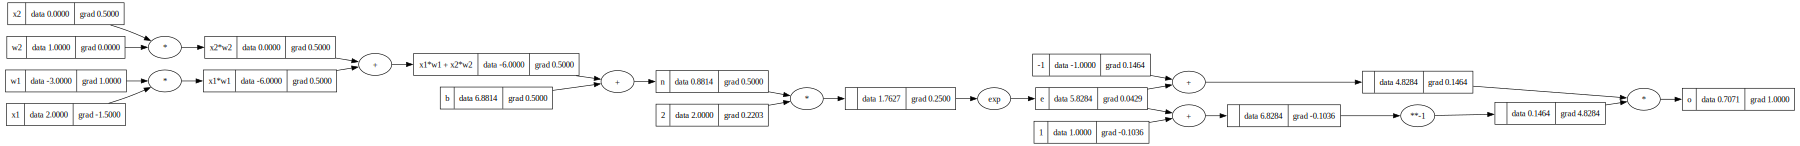

In [424]:
# Lets break up the tanh into its exponential form:
# tanh = (exp(2x) - 1)/ (exp(2x) + 1)

# the inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')

x1w1 = x1 * w1; x1w1.label='x1*w1'
x2w2 = x2 * w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1*w1 + x2*w2'

n = x1w1x2w2 + b; n.label='n'

e= (2*n).exp(); e.label = 'e'
output = (e - 1) / (e + 1)

output.label = 'o'
output.backward()
draw_dot(output)

Learning from the above experiment: We can implement backward propogation of derivatives and the chain rule either to the atomic level of addition / subtraction or we can have a composite funtion , like that of a tanh types and have its backward propagation value.

Now, lets see how we can implement the same as above using a modern deep neural network library of pytorch

### Pytorch

In [425]:
import torch

x1 = torch.Tensor([2.0]).double();                      x1.requires_grad = True  
w1 = torch.Tensor([-3.0]).double();                     w1.requires_grad = True
x2 = torch.Tensor([0.0]).double();                      x2.requires_grad = True
w2 = torch.Tensor([1.0]).double();                      w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double();        b.requires_grad = True

# the reason we are casting the values to double above = we want to have float64 double precision instead of single precision float32
# Also by default, pytorch does not assign gradient values to leaf nodes, thats why we have to do: x1.requires_grad = True

n = x1*w1 + x2*w2 + b
output = torch.tanh(n)  # Calculates the forward pass

In [426]:
print(output.data.item())   # Prints the forward pass
output.backward()           # Calculates the backward propagation - gradients

0.7071066904050358


In [427]:
print('x1: ', x1.grad.item())
print('w1: ', w1.grad.item())
print('x2: ', x2.grad.item())
print('w2: ', w2.grad.item())

x1:  -1.5000003851533106
w1:  1.0000002567688737
x2:  0.5000001283844369
w2:  0.0


The above was just to show that pytorch is an advanced and much more performant version of the micrograd module that we built

Above we were able to show how to build the mathematical expressions using python.
Now we will start to build our neural network

**Neural Networks** are special class of **Mathematical Expressions**


### Building our Neural Network
We will start with building a single individual neuron and then proceed to Building our 2 Layered - Multi Layered Perceptron

#### Building Single Individual Neuron

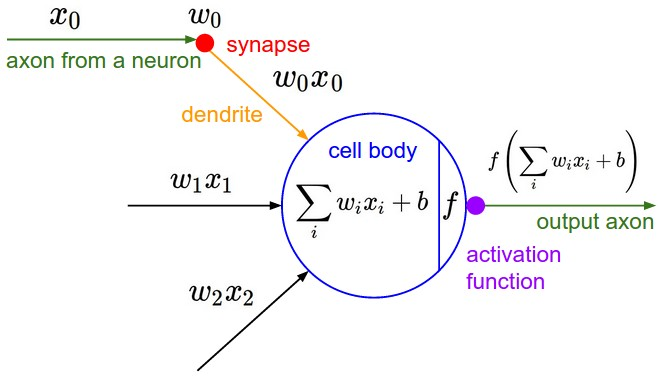

In [428]:
class Value:

    # When we are creating a atomic value (directly from a numnerical input like 2.0, -3.0), the children tuple will be empty
    def __init__(self, data, _children=(), _op = "", label = ""):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op   # if will keep track of the operation that created the object. For leaf objects it will be empty
        self.label = label

        self._backward = lambda: None

    def __repr__(self):
        return f"Value(data = {self.data})"
    
    # When we are creatign a Value object using some mathematical operation, then we will keep track of the basic building block of the atomic values which were used to create them. 
    # Eg. if we are creating an object using , a and b : c = a+b, then we will keep track of 'a' and 'b'

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other, label=str(other))

        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += 1 * out.grad
            other.grad += 1 * out.grad

        out._backward = _backward

        return out
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other, label=str(other))

        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward
        return out
    
    def __rmul__(self, other):
        """ if 2 * a does not work, then python will try to do a * 2 if we define a rmul Dunder Method
        it will return other * self
        eg. if we try to do 2 * a : 
        __mul__ function will fail, but if we define __rmul__, then it will swap the variables and return a * 2"""
        
        return self * other
    
    def __radd__(self, other):
        return self + other
    
    def tanh(self):
        x = self.data
        tanh = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(tanh, (self, ), 'tanh')  # this value's child is only self, thats why the tuple is (self, )

        def _backward():
            self.grad += (1 - tanh**2) * out.grad   # Notice that since tanh is the last operation - activation function, out.grad will always be 1

        out._backward = _backward

        return out
    
    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ), 'exp')

        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward

        return out
    
    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data ** other, (self, ), f'**{other}')

        def _backward():
            self.grad += other * (self.data ** (other - 1)) * out.grad
        
        out._backward = _backward

        return out
    
    def __truediv__(self, other): # self / other
        """reuses your existing __mul__ and __pow__ instead of writing division from scratch.
        c = a / b        # → calls a.__truediv__(b)
        # → returns a * b**-1
        """
        return self * other**-1
    
    # To implement subtraction, we will use addition of negation

    def __neg__(self):
        return self * -1
    
    def __sub__(self, other):
        return self + (-other)
    
    def backward(self):
    
        # Tolological sort
        topo: list[Value] = []
        visited: set[Value] = set()

        def build_topo(v: Value):
            if v not in visited:
                visited.add(v)

                for child in v._prev:
                    build_topo(child)

                topo.append(v)

        build_topo(self)
        # print(topo)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [449]:
import random

class Neuron:

    def __init__(self, nin):
        """nin - The constructor will take the number of inputs coming to the neuron
        The neuron will create a weight (a random number between -1 and 1) for every input (nin) and a bias to control the overall trigger happiness of this neuron"""

        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]      # w => weight
        self.b = Value(random.uniform(-1,1))

    def __call__(self, x):
        """
        Makes the neuron callable: n(x) works like a function.
        
        Example:
            n = Neuron(2)
            x = [2.0, 3.0]
            result = n(x)        # → calls n.__call__(x) behind the scenes
            result = n.__call__(x)  # same thing, but explicit
        
        This is Python's magic to make objects behave like functions.

        Using this, we would like to have the forward pass of this neuron - the activation function for this neuron:
        w * x + b
        """
        
        activation = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
        output = activation.tanh()                      # pass the activation through a non-linearity function
        return output

In [450]:
x = [2.0, 3.0]
n = Neuron(2)
n(x)

Value(data = 0.9066513292517521)

In the above code, we have a single neuron with 2 inputs, x1 and x2 (x[0] and x[1]) and the associated weights to them: self.w = [value object, value object]
and the operation is w*x +b which is them passed through the activation function

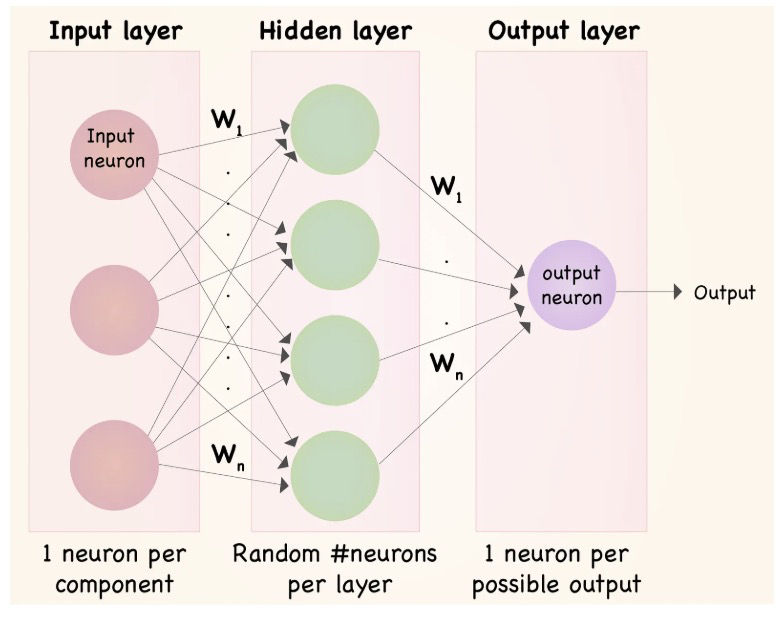

If you see the above image, it is an image of a mulilayered neural network.
Each layer (Input layer, hidden layer, output layer) has multiple neurons which are not connected to each other but are fully connected to each input.

So in general, each layer is a **list of individual neuron**

In [451]:
class Layer:

    def __init__(self, nin, nout):
        """
        nin = dimensionality of the input (x1, x2, ...., xn)
        nout = total number of neurons in the layer
        Total number of neurons in a layer = total number of outputs from the layer ; as each neuron will have only 1 output
        """
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        # passes each input through each neuron in the layer

        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs          # if the layer has only 1 neuron, then return the value instead of the list

In [452]:
x = [2.0, 3.0]      # 2 dimensional input
layer1 = Layer(2, 3)      # we want 3 neurons in the layer
layer1(x)

[Value(data = -0.7962777990264113),
 Value(data = 0.9989406191500695),
 Value(data = 0.9121076124619755)]

In [453]:
def draw_dot(root):
    dot = Digraph(graph_attr={
        'rankdir':'LR',
        'size': '25,15',   # 10" wide, 5" tall, fit exactly
        }) # LR = left to right

    nodes, edges = trace(root)

    for n in nodes:
        uid = str(id(n))

        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape = 'record')

        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)

            # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
                 
    return dot

### Multi-Layer Neural Network

Lets build a multilayer neural network like below

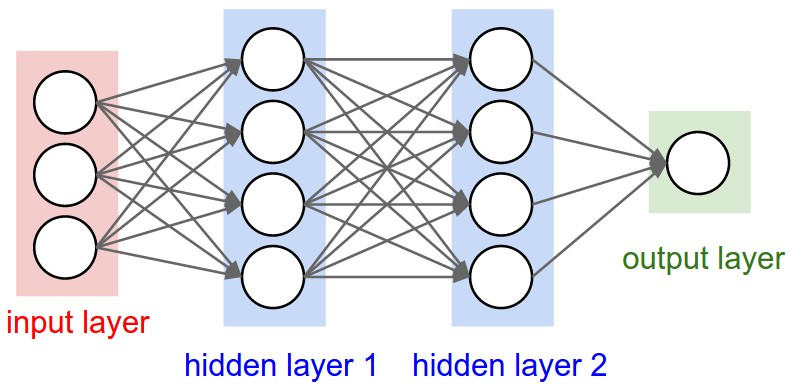

In [454]:
class MLP:
    def __init__(self, nin, nouts):
        # nouts is the list of number of neurons in each layer : the number of elements of list nouts = number of layers

        sz = [nin] + nouts          # list of all the dimentions of the layers including input
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

In [455]:
mlp = MLP(3, [4, 4, 1])     # input has 3 dimensions, 2 hidden layer (of 4 neurons each) and 1 output layer

x = [2.0, 3.0, -1.0]

n = mlp(x)

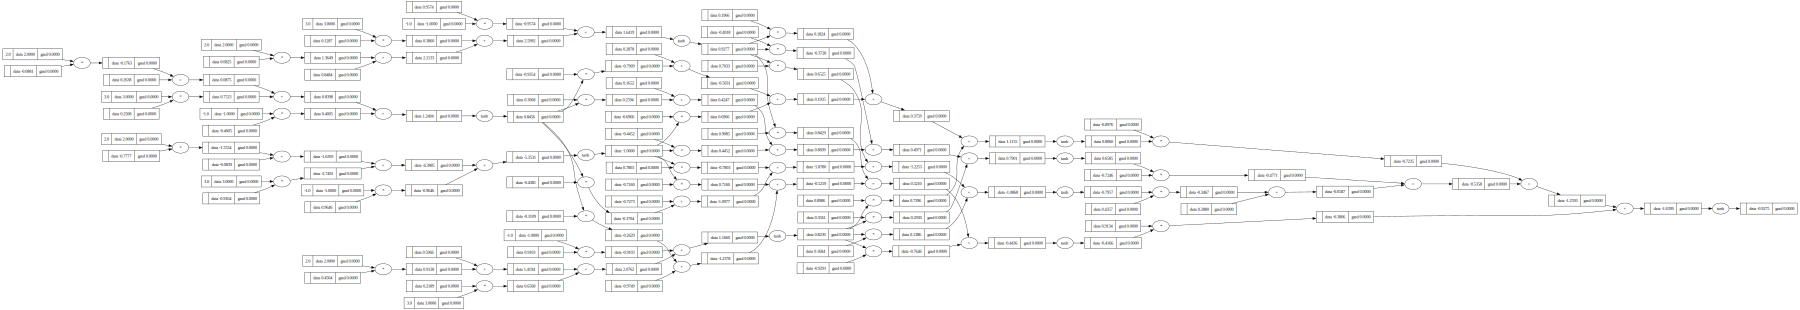

In [456]:
draw_dot(n)

### Back Propagation for MLP designed above

In [457]:
# Let's create a simple example dataset

# The below has 4 examples in xs list

xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

ys = [1.0, -1.0, -1.0, 1.0]  # desired targets


# what the desired neural network should do?
# It should return the value of 1.0 (ys[0]) when the input is [2.0, 3.0, -1.0] (xs[0])
# It should return the value of -1.0 (ys[1]) when the input is [3.0, -1.0, 0.5] (xs[1])
# It should return the value of -1.0 (ys[2]) when the input is [0.5, 1.0, 1.0] (xs[2])
# It should return the value of 1.0 (ys[3]) when the input is [1.0, 1.0, -1.0] (xs[3])

Let's see what our already designed neural network thinks of our inputs

In [459]:
y_prediction = [mlp(x) for x in xs]
y_prediction

[Value(data = -0.927453468255305),
 Value(data = -0.8313179920004159),
 Value(data = -0.8855452593971848),
 Value(data = -0.8370324772691715)]

As per above results:
y_prediction[0] = -0.927453468255305  | and ys[0] = 1.0 => we want the y_prediction to go up by 1.928
y_prediction[1] = -0.8313179920004159  | and ys[1] = -1.0 => we want the y_prediction to go down by 0.17
y_prediction[2] = -0.8855452593971848  | and ys[2] = -1.0 => we want the y_prediction to go up by 0.12
y_prediction[3] = -0.8370324772691715  | and ys[3] = 1.0 => we want the y_prediction to go up by 1.83

how do we tune the weights in order to better predict the desired result?

The trick in deep learning is to calculate a single number, that some how measures the total performance of the entire neural network: which we call the **LOSS**

The loss tells us how well the neural network is performing

High Loss - The neural network is not performing well (as in our case right now)

Our goal will be to minimise the loss

Loss function - we can use the **Mean squared error loss**

In [ ]:
# Checking individual squared error loss
# yp is the individual predicted value and y is the ground truth value (individual value in ys)

[ (yp - y)**2 for yp, y in zip(y_prediction, ys)]

[Value(data = 3.715076872289404),
 Value(data = 0.028453619822771756),
 Value(data = 0.013099887646457723),
 Value(data = 3.3746883225417093)]

In the above , we see that some values are too off (by the high values of loss)
we need to bring each loss value down.

So lets define our loss value

In [463]:
loss = sum([ (yp - y)**2 for yp, y in zip(y_prediction, ys)])
print(loss)

Value(data = 7.131318702300343)


We need to minimise the loss
We need to make loss as closer to 0 as possible in such a way that each yp is as close to y as possible

thats why we are taking the square of individual losses. other wise we might end up getting 0 by the below y_prediction as well
[12, -10, -3, 5]

if we simply do yp - y , we will get: [11, -11, -4, 4]
Here if we simply add the yp - y list values, we will get 0 but this is a worst neural network 
To save ourselves from this, we are squaring individual losses and then minimizing the loss.

Let's back track and calculate the gradient of each node

In [464]:
loss.backward()

In [465]:
# Let's check the gradient of the input neuron

mlp.layers[0].neurons[0].w

[Value(data = -0.0881273076577278),
 Value(data = 0.25076645055602764),
 Value(data = -0.40054615732473975)]

In [466]:
mlp.layers[0].neurons[0].w[0].grad

-0.16103662901215868

The above value of gradient (-0.16103662901215868) tells that this specific weight affects the loss in a negative way, i.e, this weight influences the loss negatively , as its value is negative.
This means, slightly increasing the value of this weight (for the specific input to the neuron), will decrease the loss value.

The gradient of every node, stores this information, about how that specific weight will affect the loss value. 
If the gradient of that node is -ve, then increasing the value of the weight will decrease the loss value and 
If the gradient of that node is +ve, then increasing the value of the weight will increase the loss further: so we need to decrease the weight value of such a node.

If we try to draw the loss, it will be a massive graph as it is also the combination of the mean squared loss calculated over the mlp.

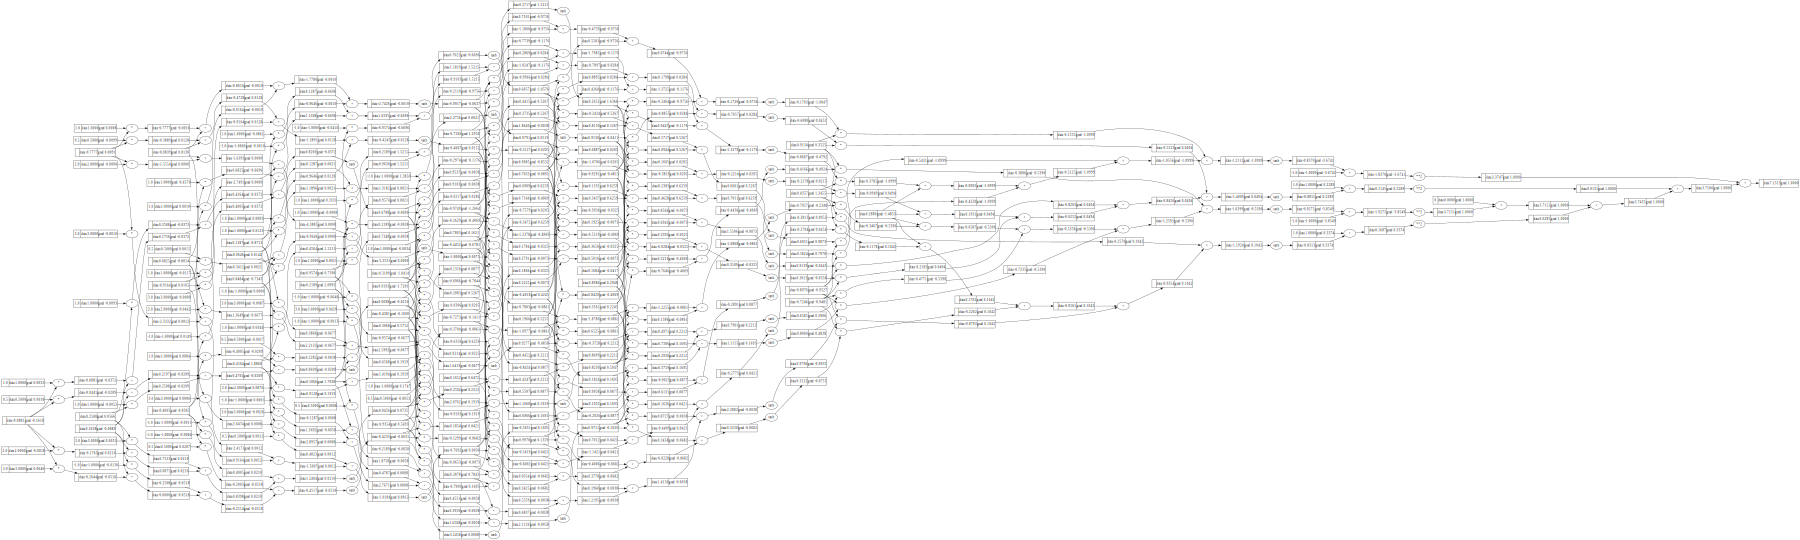

In [470]:
draw_dot(loss)

Every node in this graph has its own gradient. This gradient has been calculated by back tracking from loss to the input scalars (xs) through the entire mlp (neural network).
The gradient value of input (xs) is of no use as we cannot change the input to the neural network (it is fixed) however, we should check the gradient values of each weights which we are calculating while defining the neuron
    self.w = [Value(random.uniform(-1,1)) for _ in range(nin)] 


We should define the neuron in such a way that we can nudge slightly the weights as well as the bias as per the gradient value.
 w*x + b  -> here we cannot change x as it is the input to the neural network, however, we should tinker the values of w and b

### Redefining the Neuron, Layer and MLP - To get all parameters
We are redefining the neuron, layer and mlp so that they can return us the list of all weights and biases, which we can operate upon so as to reduce the loss

In [471]:
import random

class Neuron:

    def __init__(self, nin):
        """nin - The constructor will take the number of inputs coming to the neuron
        The neuron will create a weight (a random number between -1 and 1) for every input (nin) and a bias to control the overall trigger happiness of this neuron"""

        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]      # w => weight
        self.b = Value(random.uniform(-1,1))

    def __call__(self, x):
        """
        Makes the neuron callable: n(x) works like a function.
        
        Example:
            n = Neuron(2)
            x = [2.0, 3.0]
            result = n(x)        # → calls n.__call__(x) behind the scenes
            result = n.__call__(x)  # same thing, but explicit
        
        This is Python's magic to make objects behave like functions.

        Using this, we would like to have the forward pass of this neuron - the activation function for this neuron:
        w * x + b
        """
        
        activation = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
        output = activation.tanh()                      # pass the activation through a non-linearity function
        return output
    
    def parameters(self):
        # provides the list of all weight inputs to this neuron and the bias
        
        return self.w + [self.b]

In [472]:
class Layer:

    def __init__(self, nin, nout):
        """
        nin = dimensionality of the input (x1, x2, ...., xn)
        nout = total number of neurons in the layer
        Total number of neurons in a layer = total number of outputs from the layer ; as each neuron will have only 1 output
        """
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        # passes each input through each neuron in the layer

        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs          # if the layer has only 1 neuron, then return the value instead of the list
    
    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]

        

In [473]:
class MLP:
    def __init__(self, nin, nouts):
        # nouts is the list of number of neurons in each layer : the number of elements of list nouts = number of layers

        sz = [nin] + nouts          # list of all the dimentions of the layers including input
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
    
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

In [474]:
# Reinitializing the network

x = [2.0, 3.0, -1.0]
mlp = MLP(3, [4, 4, 1])
mlp(x)

Value(data = 0.9348031649631937)

In [478]:
# Total number of parameters in the above neural network
len(mlp.parameters())

41

In [479]:
# Let's check the parameters of the mlp
mlp.parameters()

[Value(data = 0.992215357009141),
 Value(data = 0.14495475392130364),
 Value(data = -0.7297563228076867),
 Value(data = 0.171729647992102),
 Value(data = -0.879592843020653),
 Value(data = -0.7560234522743252),
 Value(data = 0.602874930022202),
 Value(data = -0.06699816288775362),
 Value(data = 0.40814310821108735),
 Value(data = 0.5576834798205441),
 Value(data = 0.2809501144510167),
 Value(data = 0.3692805363077136),
 Value(data = -0.5935328758898399),
 Value(data = 0.3085025255238478),
 Value(data = -0.6824194506701851),
 Value(data = -0.8317193055224452),
 Value(data = -0.9439856976847245),
 Value(data = 0.34582168012471226),
 Value(data = -0.03415781048688382),
 Value(data = -0.14748606672398568),
 Value(data = -0.05697907726875595),
 Value(data = 0.5019117323216504),
 Value(data = -0.13594287915546976),
 Value(data = -0.6733227147002692),
 Value(data = -0.41249904072025956),
 Value(data = -0.4379493139918669),
 Value(data = -0.49210240454284837),
 Value(data = 0.19667942755814827

In [480]:
# Reinitializing the network
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

ys = [1.0, -1.0, -1.0, 1.0]  # desired targets
y_prediction = [mlp(x) for x in xs]
y_prediction

[Value(data = 0.9348031649631937),
 Value(data = 0.9502132173552262),
 Value(data = 0.7947774479894987),
 Value(data = 0.9346885909707011)]

In [481]:
loss = sum([ (yp - y)**2 for yp, y in zip(y_prediction, ys)])
print(loss)

Value(data = 7.033073888406929)


In [482]:
# Let's calculate the gradients in back propagation
loss.backward()

In [484]:
mlp.layers[0].neurons[0].w[0].grad

0.6585248333271091

In [ ]:
mlp.layers[0].neurons[0].w[0].data

0.992215357009141

### Gradient Descent 

Going through each gradient 
In this situation, we are thining of the gradient as a vector pointing towards the direction of increased loss. (If gradient is positive, it is pointing towards increasing loss; if gradient is negative, it is pointing towards decreasing loss)

Now, let's go through each parameter of the above mlp and try to tweak them based on the gradient so as to reduce the loss.

We can get the direction of the slight movement by the sign of gradient.
If the gradient is negative -> it implies that increasing the value of that node, will decrease the loss
Hence, we should add to the value of the node (opposite sign as that of gradient)
parameter new value = slight increment * (-1) * gradient

If gradient is negative, then the node data should be increased
If the gradient is positive, then the node data should be decreased
Hence , multiplied with -1

Another interpretation of this is: the gradient is a vector pointing towards the direction of increasing loss.
And we want to decrease the loss
Hence we should go to the opposite direction of the loss. Hence -1

In [486]:
for p in mlp.parameters():
    p.data += -0.01 * p.grad

In [487]:
mlp.layers[0].neurons[0].w[0].grad

0.6585248333271091

In [488]:
mlp.layers[0].neurons[0].w[0].data

0.9856301086758699

Notice that the data has reduced. Which is the right thing. As the gradient is +ve, to reduce the loss, we should reduce the value of this node data, and that is what has happened.

Now since we have updated the parameters (weights of inputs to each neuron and the biases), let's recalculate the loss

In [490]:
y_prediction_new = [mlp(x) for x in xs]
loss = sum([ (yp - y)**2 for yp, y in zip(y_prediction_new, ys)])
print(loss)

Value(data = 6.841077310392361)


Comparing the two losses:
loss from : y_prediction  = 7.033073888406929
loss from : y_prediction_new = 6.841077310392361

A Lower loss value suggests that the predictions now are better than earlier.

So now we calculate the new gradients on the new parameters

In [491]:
loss.backward()

In [492]:
# Re-evaluating the parameters
for p in mlp.parameters():
    p.data += -0.01 * p.grad

In [494]:
y_prediction_new2 = [mlp(x) for x in xs]
loss = sum([ (yp - y)**2 for yp, y in zip(y_prediction_new2, ys)])
print(loss)

Value(data = 6.321820763679659)


We just continue doing this till we are able to bring the loss to the minimal.
Below we are trying to do the following steps in a loop till we are able to minimize loss:
1. forward pass - to calculate the predictions
1.1 check loss and the predicted values
2. backward pass - to update the gradients
3. nudge the parameters by a step size (0.0001 in our case)

Remember: If we keep the step size too big, we would be jumping across the minimum value 
if we keep the step size too small, it might take us a lot of iterations to reach to the minimum

1.1 When we check the loss and the predicted values, we will notice that as the loss decreases, the predicted values come closer to the actual values

In [622]:
# Forward Pass
y_pred = [mlp(x) for x in xs]
loss = sum([(yp - y)**2 for yp, y in zip(y_pred, ys)])
print("Loss: --->>>  ", loss)
print(10*"=")
print("Actual Values: ", ys)
print("Predicted Values: ",y_pred)

# Backward pass
loss.backward()

# update the parameters
for p in mlp.parameters():
    p.data += -0.01 * p.grad

Loss: --->>>   Value(data = 1.855640588839297e-25)
Actual Values:  [1.0, -1.0, -1.0, 1.0]
Predicted Values:  [Value(data = 0.9999999999999976), Value(data = -0.9999999999996971), Value(data = -0.9999999999996937), Value(data = 0.9999999999999984)]


In [623]:
mlp.parameters()

[Value(data = -2.677071269181301),
 Value(data = 1.5351096932435224),
 Value(data = -4.676574997306859),
 Value(data = -2.189791954738131),
 Value(data = 1.188603480437272),
 Value(data = -0.29682601875538184),
 Value(data = 1.9417734406586729),
 Value(data = 1.4556596466674891),
 Value(data = 0.7080721369351182),
 Value(data = -0.7581221515440896),
 Value(data = 1.8539493890967482),
 Value(data = 0.02700249812652583),
 Value(data = 1.184521606435522),
 Value(data = 2.457922701931702),
 Value(data = -4.384534787450943),
 Value(data = -0.3133137283611531),
 Value(data = -2.8385056851182315),
 Value(data = 1.511919468113055),
 Value(data = 1.2754255068098623),
 Value(data = -4.935038165585351),
 Value(data = 1.6052712231922144),
 Value(data = 2.027869171355804),
 Value(data = -1.680142610982046),
 Value(data = 0.23043158908100378),
 Value(data = 2.0968360821930476),
 Value(data = 0.7414020339472212),
 Value(data = 0.590578477911018),
 Value(data = -0.5289212448981133),
 Value(data = -0.8

In [624]:
y_pred

[Value(data = 0.9999999999999976),
 Value(data = -0.9999999999996971),
 Value(data = -0.9999999999996937),
 Value(data = 0.9999999999999984)]

Let's implement an actual training loop.

### Training Loop

In [626]:
# Initializing the mlp

x = [2.0, 3.0, -1.0]
mlp = MLP(3, [4, 4, 1])
mlp(x)

xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

ys = [1.0, -1.0, -1.0, 1.0]  # desired targets

In [ ]:
for k in range(20):

    # Forward Pass
    y_prediction = [mlp(x) for x in xs]
    loss = sum((yp - y)**2 for yp, y in zip(y_prediction, ys))

    # Backward pass
    loss.backward()

    # Parameter Update : Gradient Descend
    learning_rate = -0.05
    for p in mlp.parameters():
        p.data += learning_rate * p.grad

    print(f'Current Step = {k} | Current Loss = {loss.data}')

Current Step = 0 | Current Loss = 1.4076829667673966e-16
Current Step = 1 | Current Loss = 6.003578146892033e-17
Current Step = 2 | Current Loss = 2.4073051796704897e-17
Current Step = 3 | Current Loss = 9.028222362150102e-18
Current Step = 4 | Current Loss = 3.1782469415187035e-18
Current Step = 5 | Current Loss = 1.056150710112707e-18
Current Step = 6 | Current Loss = 3.3342557045753773e-19
Current Step = 7 | Current Loss = 1.0067401879719812e-19
Current Step = 8 | Current Loss = 2.9264808131667184e-20
Current Step = 9 | Current Loss = 8.240405737610622e-21
Current Step = 10 | Current Loss = 2.2599265342712285e-21
Current Step = 11 | Current Loss = 6.064597539749621e-22
Current Step = 12 | Current Loss = 1.5986514717000021e-22
Current Step = 13 | Current Loss = 4.152045357068329e-23
Current Step = 14 | Current Loss = 1.0652074899971556e-23
Current Step = 15 | Current Loss = 2.7046225434735136e-24
Current Step = 16 | Current Loss = 6.808021467781587e-25
Current Step = 17 | Current Los

In [629]:
y_prediction

[Value(data = 1.0),
 Value(data = -0.9999999999999343),
 Value(data = -0.9999999999999131),
 Value(data = 1.0)]

There is a bug that we have put in our code above, and as per Andrej Karpathy, these types of bugs are very common in a neural network:
1. You didn't try to overfit a single batch first
2. You forgot to toggle train/eval mode for the net
3. You forgot to .zero_grad() before .backward() in pytorch
4. You passed softmaxed outputs to a loss that expects raw logits


From the above common mistakes, we have committed mistake #3

Every parameter (weights and biases) in the neuron has 2 attributes : .data and .grad
.grad starts at 0 and when we do .backward(), we fill in the gradients
and then we do an update on the parameter data : `p.data += learning_rate * p.grad` without flushing the grad.
So when we run another iteration of the tuning (forward pass) and we do .backward() again, we are doing it on the previously calculated grad without resetting them to zero

The reason our code worked and gave us a really low loss value even in the first try is because our inputs are too small and simple. So the bug might not have given us the optimized weights if our inputs would have been more complex.
So it is always necessary to keep track of common mistakes so that we avoid them. As working with neural networks is a bit tricky as we may have lots of bugs in the code and the neural network might work, but the chances are that it worked on the training data or our data but it might give random results on a different input data set and then we might not be able to figure out the issue.
Below is the updated code with the rectified forward and backward pass.

In [630]:
# Reset the mlp

x = [2.0, 3.0, -1.0]
mlp = MLP(3, [4, 4, 1])
mlp(x)

xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

ys = [1.0, -1.0, -1.0, 1.0]  # desired targets

In [666]:
for k in range(20):

    # Forward Pass
    y_prediction = [mlp(x) for x in xs]
    loss = sum((yp - y)**2 for yp, y in zip(y_prediction, ys))

    # Backward pass
    for p in mlp.parameters():
        p.grad = 0.0
    loss.backward()

    # Parameter Update : Gradient Descend
    learning_rate = -0.1
    for p in mlp.parameters():
        p.data += learning_rate * p.grad

    print(f'Current Step = {k} | Current Loss = {loss.data}')

Current Step = 0 | Current Loss = 0.000566387609766725
Current Step = 1 | Current Loss = 0.0005650641983006185
Current Step = 2 | Current Loss = 0.0005637466712986073
Current Step = 3 | Current Loss = 0.0005624349903570836
Current Step = 4 | Current Loss = 0.0005611291174022587
Current Step = 5 | Current Loss = 0.0005598290146866967
Current Step = 6 | Current Loss = 0.0005585346447858168
Current Step = 7 | Current Loss = 0.0005572459705945066
Current Step = 8 | Current Loss = 0.000555962955323709
Current Step = 9 | Current Loss = 0.0005546855624970922
Current Step = 10 | Current Loss = 0.0005534137559477826
Current Step = 11 | Current Loss = 0.0005521474998150994
Current Step = 12 | Current Loss = 0.0005508867585413369
Current Step = 13 | Current Loss = 0.0005496314968685968
Current Step = 14 | Current Loss = 0.0005483816798356621
Current Step = 15 | Current Loss = 0.000547137272774891
Current Step = 16 | Current Loss = 0.0005458982413092088
Current Step = 17 | Current Loss = 0.0005446

Notice that the gradient descend this time is a bit slower and even the loss data is higher compared to the previous iteration.

In [667]:
y_prediction

[Value(data = 0.9918866319064247),
 Value(data = -0.9932175492315225),
 Value(data = -0.9857962795955001),
 Value(data = 0.9848791862841775)]

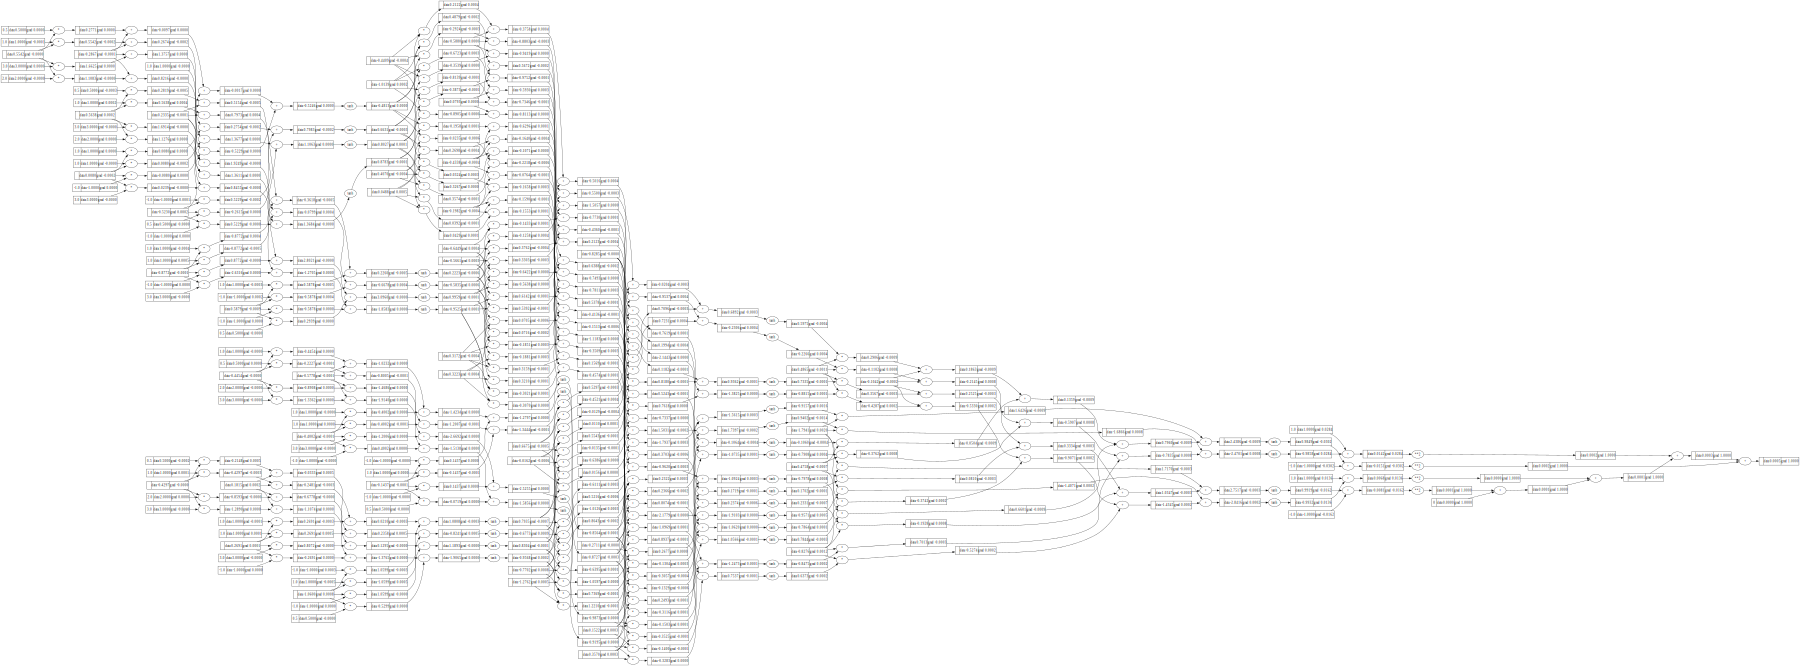

In [669]:
draw_dot(loss)

### Summary

1. Neural Networks are basically mathematical expressions
2. Multi layered perceptron is a logical representation of these mathematical expressions which 
    2.1. Take input as a data set along with the weights and parameters in the neural network
    2.2. Mathematical expression for the forward pass
    2.3. Followed by a loss function - which tries to measure the accuracy of the predictions
            Usually, the loss would be low when the predictions are matching with the actual output data
    2.4. We backpropagate the loss to calculate the gradient
    2.5. We manipulate the parameters (aka the loss function) so that the loss becomes low and the network does what we want it to do 
    2.6. Iterate steps 2.2. through 2.5. which we call **Gradient Descend**

3. Here we built a tiny network with only 41 parameters

Reference and source: https://www.youtube.com/watch?v=VMj-3S1tku0&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=1
